In [35]:
#1GA24CS403 NETFLIX DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import re

In [4]:
try:
    df = pd.read_csv("C:/Users/HM/Desktop/Netflix Dataset.csv")
except FileNotFoundError:
    print("Error: 'Netflix Dataset.csv' not found. Please upload the file to your Colab environment.")
    df = None 

if df is not None:
    # --- Data Cleaning and Preparation ---
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df['release_year'] = df['Release_Date'].dt.year
    df.dropna(subset=['release_year'], inplace=True)
    df['release_year'] = df['release_year'].astype(int)
    
    # --- Plotting Style Setup ---
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (12, 7)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'

    # --- Global Helper Function ---
    def count_items(column):
        """Counts and sorts items from a comma-separated string column."""
        counter = Counter()
        for item_list in column.dropna():
            counter.update(i.strip() for i in item_list.split(','))
        return pd.DataFrame(counter.items(), columns=['item', 'count']).sort_values('count', ascending=False)

    # --- Section 1: Content Type Analysis (Movies vs. TV Shows) ---
    print("--- Running Section 1: Content Type Analysis ---")

--- Running Section 1: Content Type Analysis ---


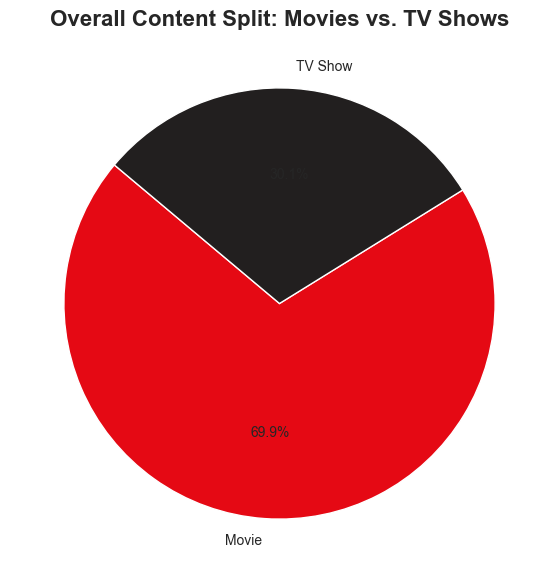

In [5]:

    # 1. Overall Content Split (Pie Chart)
    category_counts = df['Category'].value_counts()
    plt.figure()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e50914', '#221f1f'])
    plt.title('Overall Content Split: Movies vs. TV Shows', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.savefig('1_overall_content_split.png')
    plt.show()

<Figure size 1200x700 with 0 Axes>

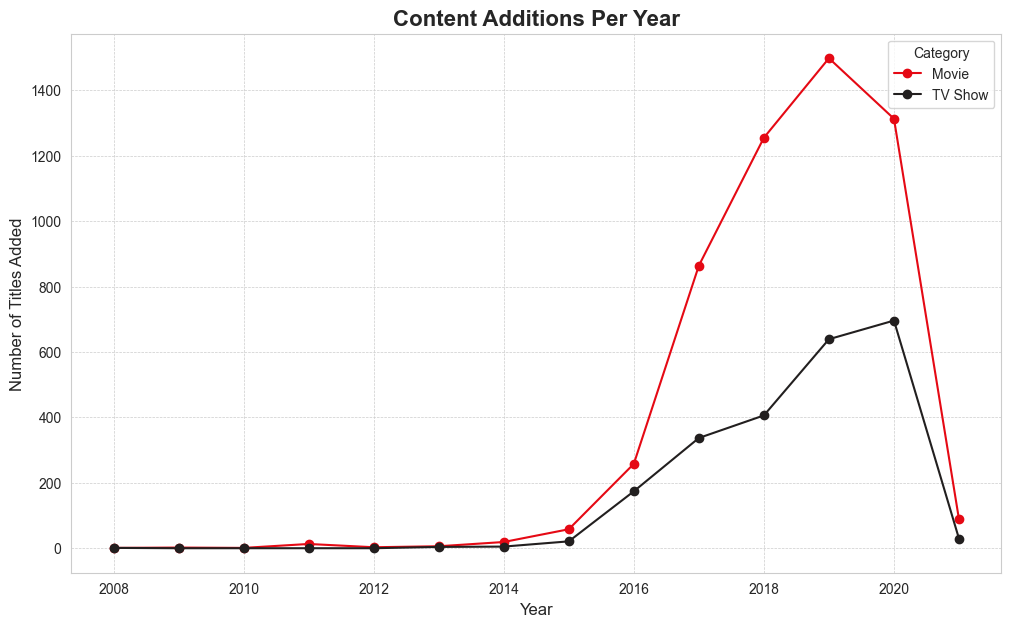

In [6]:

    # 2. Yearly Content Additions (Line Chart)
    yearly_content = df.groupby('release_year')['Category'].value_counts().unstack().fillna(0)
    plt.figure()
    yearly_content.plot(kind='line', marker='o', color=['#e50914', '#221f1f'])
    plt.title('Content Additions Per Year', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Titles Added', fontsize=12)
    plt.legend(title='Category')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig('2_yearly_content_additions.png')
    plt.show()

In [7]:

      # 3. Peak Release Year (Movies)
    peak_movie_year = yearly_content['Movie'].idxmax()
    print(f"Peak year for Movie releases: {peak_movie_year}")


Peak year for Movie releases: 2019


In [12]:
peak_tv_show_year = yearly_content['TV Show'].idxmax()
print(f"Peak year for TV Show releases: {peak_tv_show_year}")

Peak year for TV Show releases: 2020


<Figure size 1200x700 with 0 Axes>

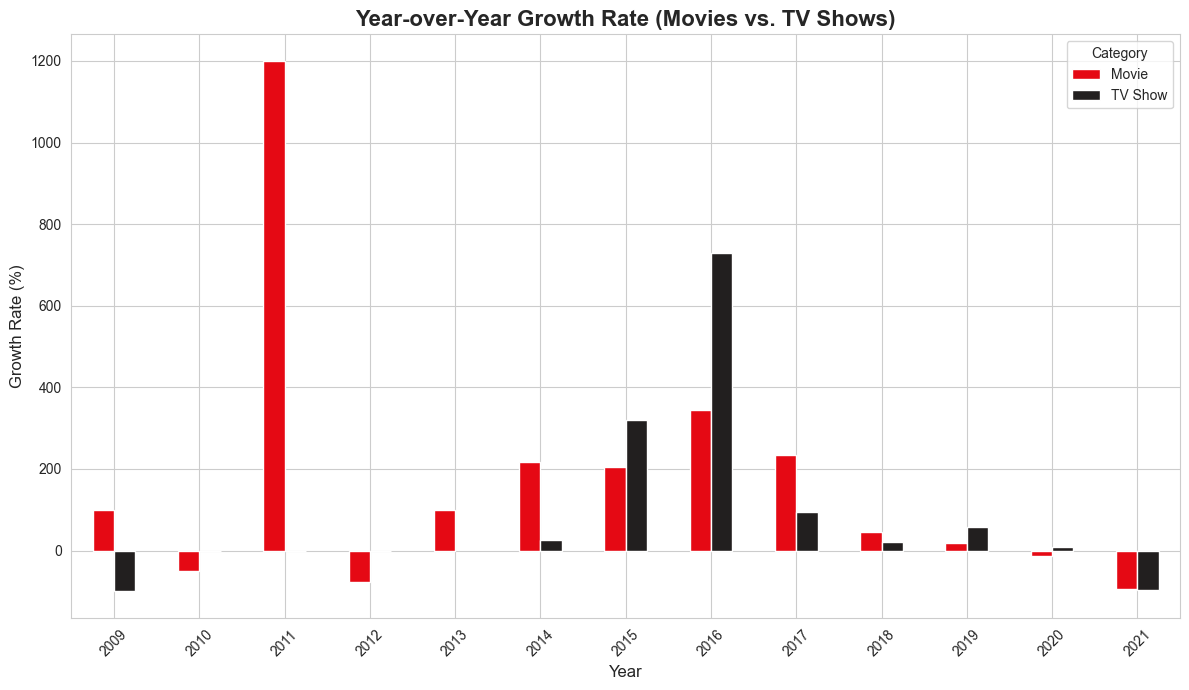

--- Section 1 Complete ---

--- Running Section 2: Genre Analysis ---


In [13]:
    growth_rate = yearly_content.pct_change().fillna(0) * 100
    growth_rate = growth_rate.iloc[1:]
    plt.figure()
    growth_rate.plot(kind='bar', color=['#e50914', '#221f1f'])
    plt.title('Year-over-Year Growth Rate (Movies vs. TV Shows)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.tight_layout()
    plt.savefig('5_growth_rate_comparison.png')
    plt.show()
    print("--- Section 1 Complete ---\n")

    # --- Section 2: Genre Analysis ---
    print("--- Running Section 2: Genre Analysis ---")
    df_genre = df.dropna(subset=['Type']).copy()

    def count_genres(column):
        return count_items(column).rename(columns={'item': 'Genre', 'count': 'Count'})


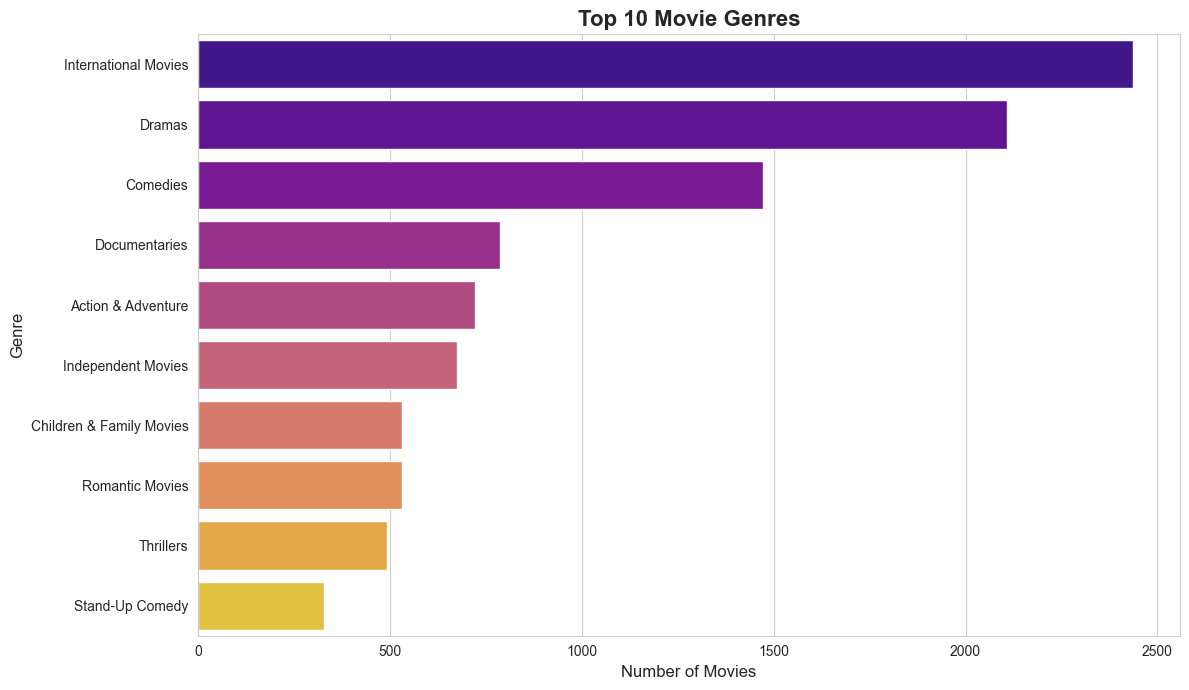

In [34]:
    #Top Genres for Movies
    df_movies_genre = df_genre[df_genre['Category'] == 'Movie']
    top_movie_genres = count_genres(df_movies_genre['Type']).head(10)
    plt.figure()
    sns.barplot(x='Count', y='Genre', data=top_movie_genres, palette='plasma', hue='Genre', legend=False)
    plt.title('Top 10 Movie Genres', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Movies', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.tight_layout()
    plt.savefig('7_top_movie_genres.png')
    plt.show()


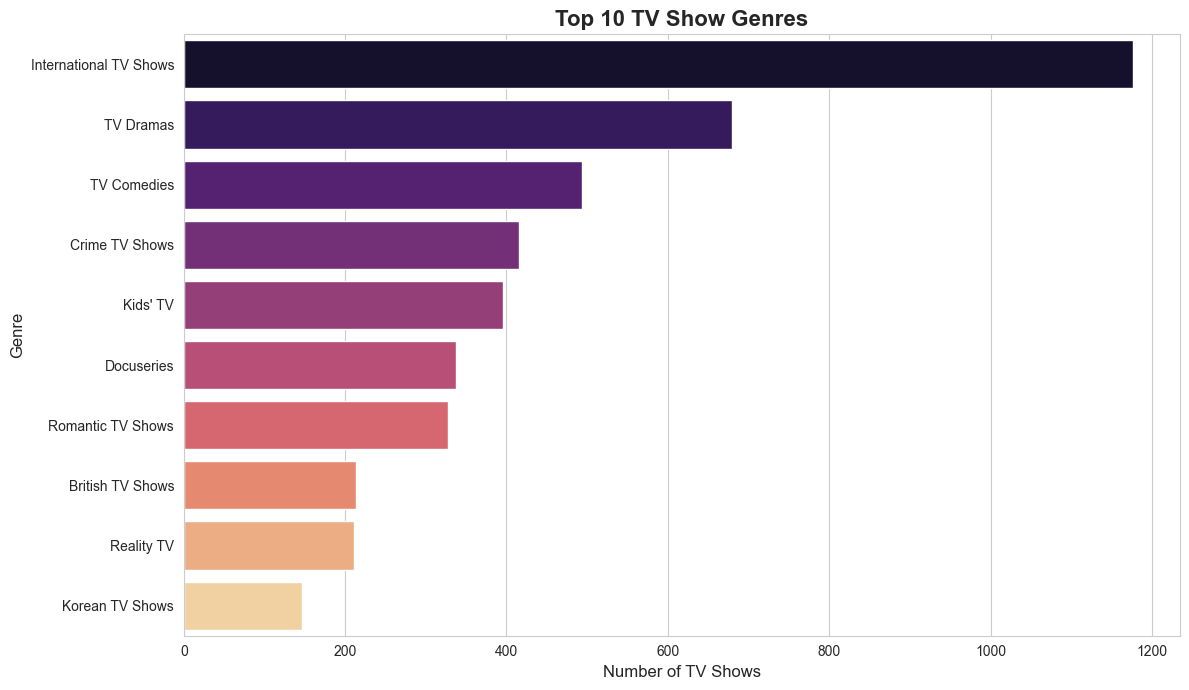

In [32]:

    #Top Genres for TV Shows
    df_tv_shows_genre = df_genre[df_genre['Category'] == 'TV Show']
    top_tv_show_genres = count_genres(df_tv_shows_genre['Type']).head(10)
    plt.figure()
    sns.barplot(x='Count', y='Genre', data=top_tv_show_genres, palette='magma', hue='Genre', legend=False)
    plt.title('Top 10 TV Show Genres', fontsize=16, fontweight='bold')
    plt.xlabel('Number of TV Shows', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.tight_layout()
    plt.savefig('8_top_tv_show_genres.png')
    plt.show()

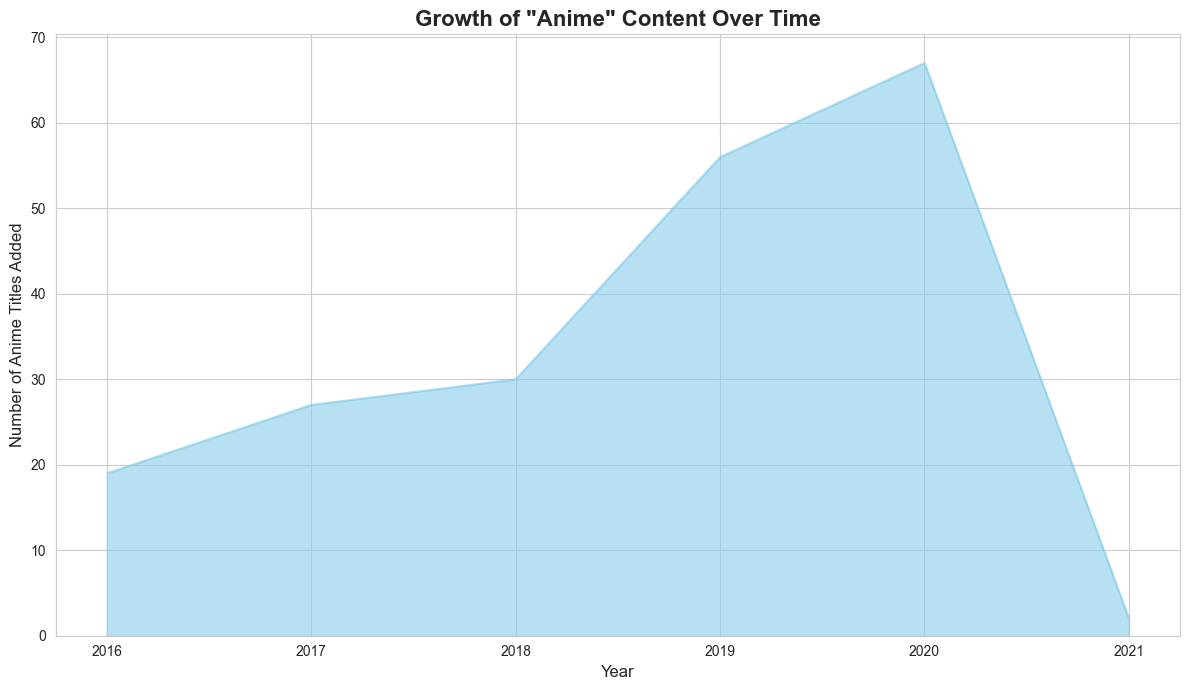

--- Section 2 Complete ---

--- Running Section 3: Geographical Analysis ---


In [31]:
    # Niche Genre Growth (Anime)
    df_genre['is_anime'] = df_genre['Type'].str.contains('Anime', case=False, na=False) # Added na=False
    anime_over_time = df_genre[df_genre['is_anime']].groupby('release_year').size()
    plt.figure()
    anime_over_time.plot(kind='area', color='skyblue', alpha=0.6)
    plt.title('Growth of "Anime" Content Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Anime Titles Added', fontsize=12)
    plt.tight_layout()
    plt.savefig('11_anime_growth.png')
    plt.show()
    print("--- Section 2 Complete ---\n")

    # --- Section 3: Geographical Analysis ---
    print("--- Running Section 3: Geographical Analysis ---")
    df_country = df.dropna(subset=['Country']).copy()

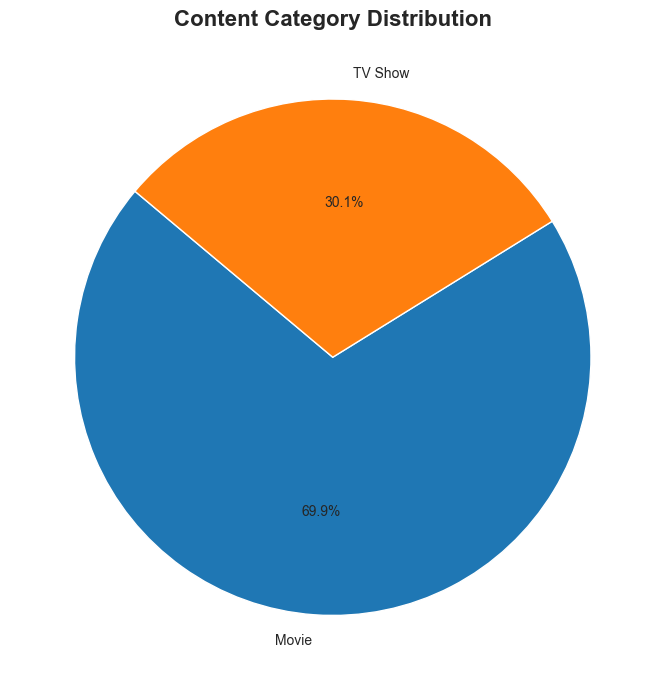

In [21]:
# Pie chart: Distribution of content categories
category_counts = df['Category'].value_counts()
plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Content Category Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('pie_chart.png')
plt.show()


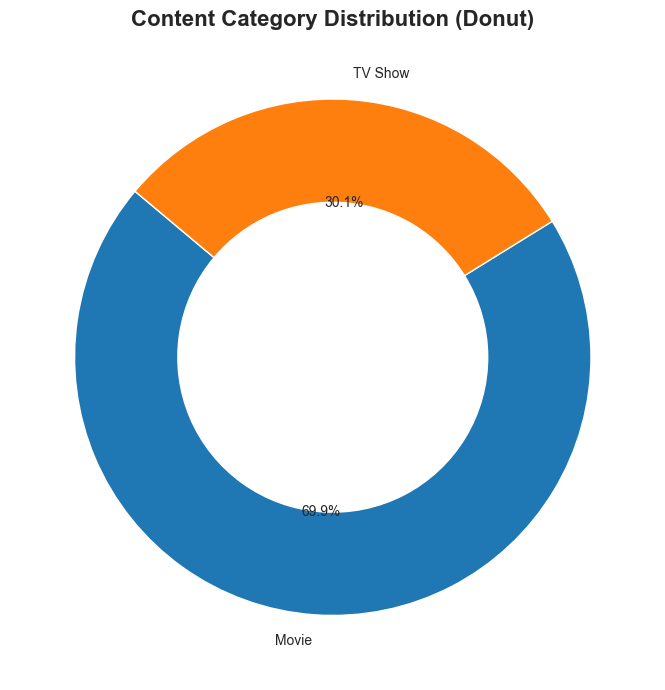

In [22]:
# Donut chart: Same data with a hole in the center
category_counts = df['Category'].value_counts()
plt.figure()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Content Category Distribution (Donut)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('donut_chart.png')
plt.show()


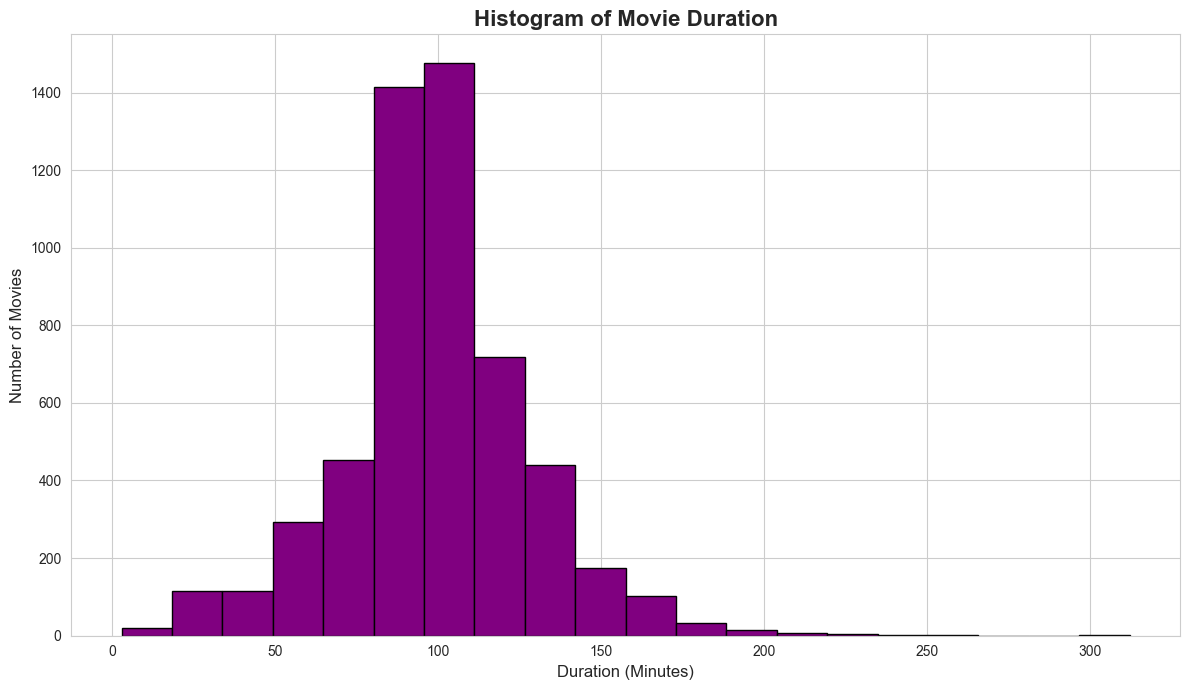

In [23]:
# Histogram: Movie duration distribution
df_movies = df[df['Category'] == 'Movie'].copy()
df_movies['duration_min'] = df_movies['Duration'].str.extract(r'(\d+)').astype(float)
plt.figure()
plt.hist(df_movies['duration_min'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Movie Duration', fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.tight_layout()
plt.savefig('histogram.png')
plt.show()


In [29]:
#DONE